In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv("seattle-weather.csv")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [4]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


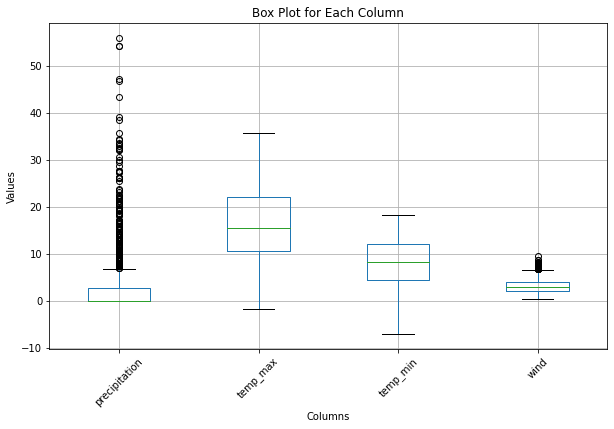

In [5]:
import matplotlib.pyplot as plt

# Plot box plots for each column in the dataset
plt.figure(figsize=(10, 6))
data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot for Each Column')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


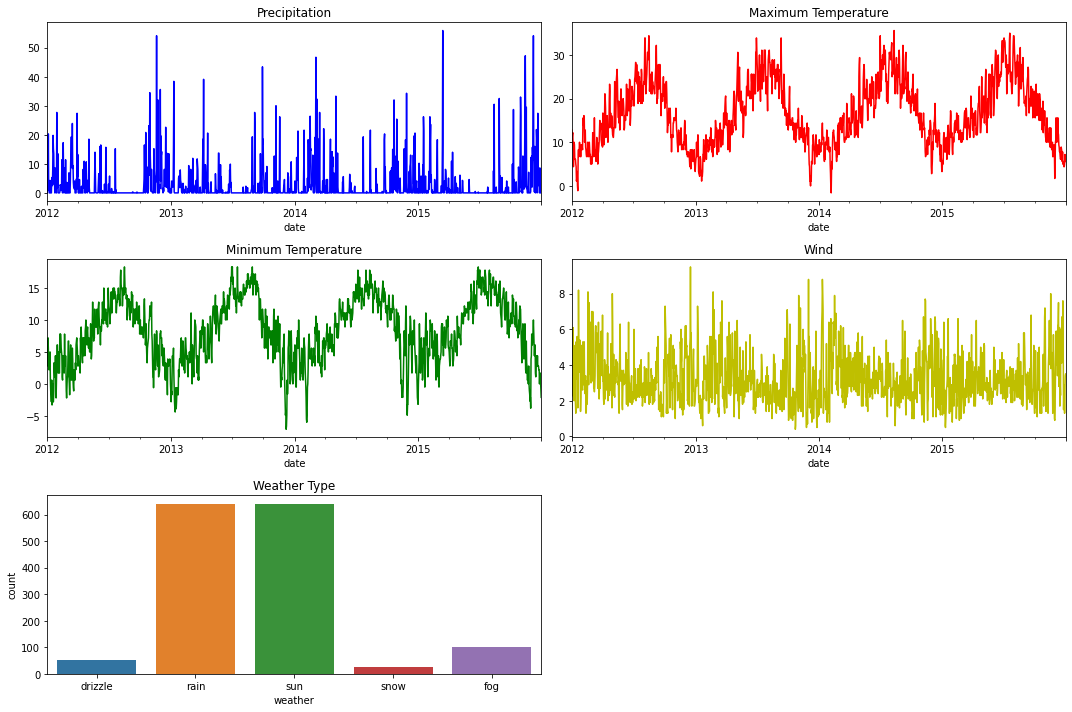

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = pd.read_csv("seattle-weather.csv")  # Replace "your_data_file.csv" with your actual file path

# Convert 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Set the 'date' column as the index
weather_data.set_index('date', inplace=True)

# Create subplots for each weather variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plot precipitation
weather_data['precipitation'].plot(ax=axes[0, 0], color='b')
axes[0, 0].set_title('Precipitation')

# Plot maximum temperature
weather_data['temp_max'].plot(ax=axes[0, 1], color='r')
axes[0, 1].set_title('Maximum Temperature')

# Plot minimum temperature
weather_data['temp_min'].plot(ax=axes[1, 0], color='g')
axes[1, 0].set_title('Minimum Temperature')

# Plot wind
weather_data['wind'].plot(ax=axes[1, 1], color='y')
axes[1, 1].set_title('Wind')

# Plot weather type
sns.countplot(x='weather', data=weather_data, ax=axes[2, 0])
axes[2, 0].set_title('Weather Type')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
data["weather"].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

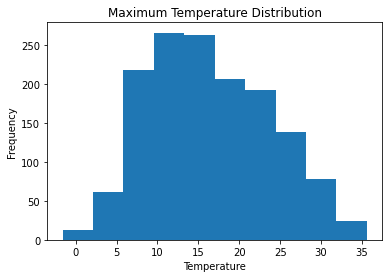

In [8]:
plt.hist(data['temp_max'])
plt.title('Maximum Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

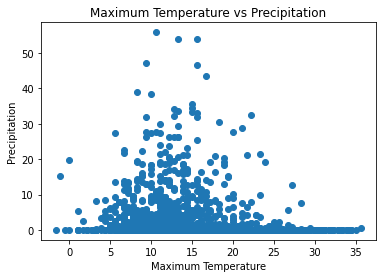

In [9]:
plt.scatter(data['temp_max'], data['precipitation'])
plt.title('Maximum Temperature vs Precipitation')
plt.xlabel('Maximum Temperature')
plt.ylabel('Precipitation')
plt.show()

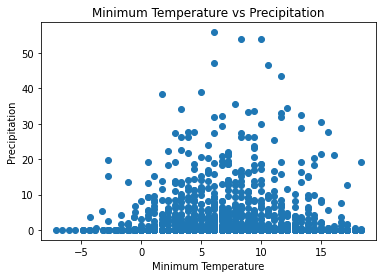

In [10]:
plt.scatter(data['temp_min'], data['precipitation'])
plt.title('Minimum Temperature vs Precipitation')
plt.xlabel('Minimum Temperature')
plt.ylabel('Precipitation')
plt.show()

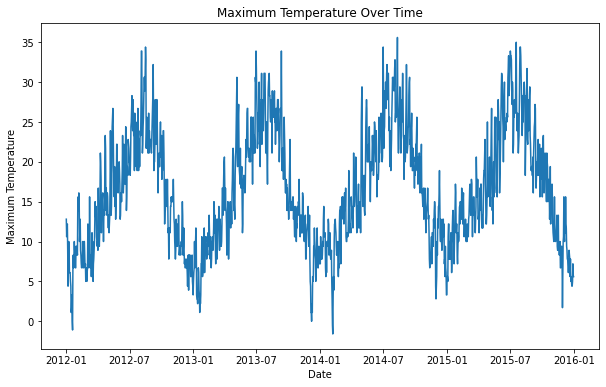

In [11]:
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temp_max'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')

plt.show()

In [12]:
print(data['date'].dtypes)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract year, month, and day features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

datetime64[ns]


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int64         
 7   month          1461 non-null   int64         
 8   day            1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 102.9+ KB


In [14]:
data

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [15]:
le = LabelEncoder()
data['weather_label'] = le.fit_transform(data['weather'])

# Create a dictionary mapping encoded labels to original weather values
weather_dict = {label: value for label, value in zip(data['weather_label'], data['weather'])}


In [35]:
weather_dict 

{0: 'drizzle', 2: 'rain', 4: 'sun', 3: 'snow', 1: 'fog'}

In [16]:
weather_dict = {label: value for label, value in zip(data['weather_label'], data['weather'])}

In [17]:
data = data.drop('weather', axis=1).set_index('date')


In [18]:
print(data.head())

            precipitation  temp_max  temp_min  wind  year  month  day  \
date                                                                    
2012-01-01            0.0      12.8       5.0   4.7  2012      1    1   
2012-01-02           10.9      10.6       2.8   4.5  2012      1    2   
2012-01-03            0.8      11.7       7.2   2.3  2012      1    3   
2012-01-04           20.3      12.2       5.6   4.7  2012      1    4   
2012-01-05            1.3       8.9       2.8   6.1  2012      1    5   

            weather_label  
date                       
2012-01-01              0  
2012-01-02              2  
2012-01-03              2  
2012-01-04              2  
2012-01-05              2  


In [19]:
x = data.drop(["weather_label"], axis= 1)
y = data["weather_label"]

In [20]:
# Split the data into training and testing sets
x_train, x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [21]:
model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [22]:
# Train the model
model.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [23]:
predictions = model.predict(x_test)

In [24]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [25]:
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

print('Accuracy Score on Train Data : {:.2f}%'.format(train_accuracy * 100))
print('Accuracy Score on Test Data : {:.2f}%'.format(test_accuracy * 100))

Accuracy Score on Train Data : 86.13%
Accuracy Score on Test Data : 88.74%


In [26]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [27]:
import numpy as np
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer

# Define the hyperparameter search space
search_space = {
    'max_leaf_nodes': Integer(2, 20),  # Maximum number of leaf nodes
    'max_depth': Integer(1, 10),  # Maximum depth of the tree
    'min_samples_split': Integer(2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': Integer(1, 20),  # Minimum samples required to be at a leaf node
    'criterion': Categorical(['gini', 'entropy'])  # Splitting criterion
}

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Perform Bayesian Optimization
opt = BayesSearchCV(
    model,
    search_space,
    n_iter=50,  # Number of iterations for the optimization
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1,  # Use all available cores
    optimizer_kwargs={'base_estimator': 'GP'}
)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Perform the optimization
opt.fit(x_train, y_train)

# Get the best parameters
best_params = opt.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters
best_model = opt.best_estimator_
train_accuracy = accuracy_score(y_train, best_model.predict(x_train))
test_accuracy = accuracy_score(y_test, best_model.predict(x_test))

print('Accuracy Score on Train Data : {:.2f}%'.format(train_accuracy * 100))
print('Accuracy Score on Test Data : {:.2f}%'.format(test_accuracy * 100))


Best Parameters: OrderedDict([('criterion', 'gini'), ('max_depth', 7), ('max_leaf_nodes', 9), ('min_samples_leaf', 1), ('min_samples_split', 2)])
Accuracy Score on Train Data : 86.13%
Accuracy Score on Test Data : 88.74%


In [28]:
import numpy as np
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skopt.space import Real, Integer

# Assuming you have your data x and y

# Define the threshold to convert regression problem into classification
threshold = 0.5  # Example threshold value

# Convert regression labels into binary classification labels based on threshold
y_train_binary = np.where(y_train >= threshold, 1, 0)
y_test_binary = np.where(y_test >= threshold, 1, 0)

# Define the hyperparameter search space
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),  # Learning rate
    'n_estimators': Integer(10, 1000),  # Number of boosting stages
    'max_depth': Integer(3, 10),  # Maximum depth of the individual estimators
    'min_samples_split': Integer(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 20),  # Minimum number of samples required to be at a leaf node
}

# Initialize the GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Perform Bayesian Optimization
opt = BayesSearchCV(
    model,
    search_space,
    n_iter=50,  # Number of iterations for the optimization
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform the optimization
opt.fit(x_train, y_train_binary)

# Get the best parameters
best_params = opt.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters
best_model = opt.best_estimator_
train_accuracy = accuracy_score(y_train_binary, best_model.predict(x_train))
test_accuracy = accuracy_score(y_test_binary, best_model.predict(x_test))

print('Accuracy Score on Train Data : {:.2f}%'.format(train_accuracy * 100))
print('Accuracy Score on Test Data : {:.2f}%'.format(test_accuracy * 100))


Best Parameters: OrderedDict([('learning_rate', 0.05868577985228596), ('max_depth', 8), ('min_samples_leaf', 3), ('min_samples_split', 6), ('n_estimators', 10)])
Accuracy Score on Train Data : 97.26%
Accuracy Score on Test Data : 96.25%


In [29]:
# Install Pyro
!pip install pyro-ppl

  Using cached pyro_ppl-1.9.0-py3-none-any.whl.metadata (7.7 kB)
  Using cached pyro_api-0.1.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached torch-2.3.0-cp39-cp39-win_amd64.whl.metadata (26 kB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached pyro_ppl-1.9.0-py3-none-any.whl (745 kB)
Using cached pyro_api-0.1.2-py3-none-any.whl (11 kB)
Using cached torch-2.3.0-cp39-cp39-win_amd64.whl (159.7 MB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 kB)
Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [30]:
pip install torch


  Using cached torch-2.3.0-cp39-cp39-win_amd64.whl.metadata (26 kB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached torch-2.3.0-cp39-cp39-win_amd64.whl (159.7 MB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 kB)
Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [32]:
pip install torch torchvision torchaudio


  Using cached torch-2.3.0-cp39-cp39-win_amd64.whl.metadata (26 kB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached torch-2.3.0-cp39-cp39-win_amd64.whl (159.7 MB)
   ---------------------------------------- 1.2/1.2 MB 564.2 kB/s eta 0:00:00
   ---------------------------------------- 2.4/2.4 MB 596.8 kB/s eta 0:00:00
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 kB)
Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [34]:
import torch
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule
from torch import nn
from torch.nn import functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, data['weather_label'], test_size=0.3, random_state=20)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)  # Assuming 'weather_label' is categorical
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)  # Assuming 'weather_label' is categorical

# Define a Bayesian neural network model using Pyro
class BayesianNN(PyroModule):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = PyroModule[nn.Linear](input_dim, 64)
        self.fc2 = PyroModule[nn.Linear](64, 32)
        self.fc3 = PyroModule[nn.Linear](32, output_dim)

    def forward(self, x, y=None):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        sigma = 0.1  # Fixed observation noise
        mean = self.fc3(x).squeeze(-1)
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Categorical(logits=mean), obs=y)
        return mean

# Define your training loop
def train(model, dataloader, optimizer, loss_fn):
    model.train()
    total_loss = 0.
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        output = model(batch_x, batch_y)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

# Define your evaluation loop
def evaluate(model, dataloader, loss_fn):
    model.eval()
    total_loss = 0.
    with torch.no_grad():
        for batch_x, batch_y in dataloader:
            output = model(batch_x)
            loss = loss_fn(output, batch_y)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Convert data to PyTorch DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=64)

# Example usage
input_dim = x_train.shape[1]  # Number of input features
output_dim = len(y_train.unique())  # Number of unique target classes

model = BayesianNN(input_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Train the model
num_epochs = 150
train_losses = []
val_losses = []
train_accuracies = []  # Store training accuracies
val_accuracies = []    # Store validation accuracies
for epoch in range(num_epochs):
    train_loss = train(model, train_dataloader, optimizer, loss_fn)
    val_loss = evaluate(model, test_dataloader, loss_fn)
    
    # Calculate training accuracy
    _, train_predictions = torch.max(model(x_train_tensor), 1)
    train_accuracy = (train_predictions == y_train_tensor).sum().item() / len(y_train_tensor)
    
    # Calculate validation accuracy
    _, val_predictions = torch.max(model(x_test_tensor), 1)
    val_accuracy = (val_predictions == y_test_tensor).sum().item() / len(y_test_tensor)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)  
print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")



ModuleNotFoundError: No module named 'torch'

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Plot loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions on the test dataset
with torch.no_grad():
    all_predictions = []
    for batch_x, batch_y in test_dataloader:
        output = model(batch_x)
        _, predicted_labels = torch.max(output, 1)
        all_predictions.extend(predicted_labels.tolist())

# Convert true labels to a list
all_targets = y_test_tensor.tolist()

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Plot confusion matrix
cm = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
# Define the input dimension
input_dim = 7

# Take user input for features
user_input = []
feature_names = ["precipitation", "temp_max", "temp_min", "wind", "year", "month", "day"]
for feature_name in feature_names:
    feature_value = float(input(f"Enter value for {feature_name}: "))
    user_input.append(feature_value)

# Convert user input to PyTorch tensor
user_input_tensor = torch.tensor(user_input, dtype=torch.float32)

# Make prediction
with torch.no_grad():
    output = model(user_input_tensor.unsqueeze(0))  # Unsqueeze to add batch dimension
    _, predicted_label = torch.max(output, 1)
    predicted_class = predicted_label.item()

print(f"The predicted weather label is: {predicted_class}")
